In [9]:
import pandas as pd
import numpy as np
import torch
import sys

sys.path.insert(0, '../../../')
sys.path.insert(0, '../../../src/')

from src.utils.script_utils import create_parser, create_data_
from scripts.softmargin_run_multi import add_arg_parser

In [10]:
seeds = np.arange(0,100).tolist()
num_conf = [1]*len(seeds)
num_conf = dict(zip(range(len(num_conf)), num_conf))

parser = create_parser()
add_arg_parser(parser)
args = parser.parse_args("")
args.type_graph="proximity"

args.N = 100
args.d = 10
args.h = 3
args.t_limit = 15 # Numbers of epoch of our epidemics spreading [0,1,...,T_limit-1]
args.lambda_ = 0.03 # probability of infection
args.mu = 0.02 # probability of recovery
args.small_lambda_limit=0
args.p_edge = 1
args.scale=2
args.a_min=0.01
args.a_max=0.3
args.a_step=0.01
args.path_contacts="i_bird_contacts.npz"
nsims=[1_000_000, 10_000_000, 100_000_000]
#nsims_str = ["1_000_000", "10_000_000"]
#nsims=[1_000]
#nsims_str = ["1000"]
path_dir = "./data"
if path_dir == "not_setted":
    path_dir = type_graph

In [11]:
import epigen

In [12]:
from epigen import epidemy_gen_new

list_contacts = {}
data_={}
INSTANCES = []
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}")
    
    args.seed=seed
    args.num_conf=num_conf[i_seed]
    #print(args)
    temp, name_file, INSTANCE = create_data_(args, give_instance=True)
    INSTANCES.append(INSTANCE)
    #Ns[cl] = int(max(temp["contacts"][:, 1]) + 1)
    list_contacts[seed] = temp["contacts"]
    data_[seed] = temp
N=args.N
data_.keys()


SEED: 0
nodes:100, edges:714
number of contacts: 21420
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 1,mean infected: 61.0, mean recover: 2.0, max num infected: 61
0 (0.00%) epidemies refused

S:39, I:59, R:2

SEED: 1
nodes:100, edges:671
number of contacts: 20130
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 1,mean infected: 84.0, mean recover: 9.0, max num infected: 84
0 (0.00%) epidemies refused

S:16, I:75, R:9

SEED: 2
nodes:100, edges:751
number of contacts: 22530
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 1,mean infected: 69.0, mean recover: 3.0, max num infected: 69
0 (0.00%) epidemies refused

S:31, I:66, R:3

SEED: 3
nodes:100, edges:718
number of contacts: 21540
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 1,mean infected: 5.0, mean recover: 0.0, max num infected: 5
0 (0.00%) epidemies refused

S:95, I:5, R:0

SEED: 4
nodes:100, edges:710
number of contacts: 21300
Lim infected: 1, Lim max infected: 101


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

# READ DATA

create name_files

In [13]:
name_files_nn = {}
Ns = [args.N]
args.d=10
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_nn[seed] = {}
    name_file_init = path_dir + "/ann_3lpow1/"
    #print(step, name_file_init)
    name_file_temp = name_file_init +str(INSTANCES[i_seed])
    #name_file_temp += f"_s_{seed}"
    name_files_nn[seed] = name_file_temp

name_files_sib = {}
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_sib[seed] = {}
    name_file_init = path_dir + "/sib/"
    #print(step, name_file_init)
    name_file_temp = name_file_init + f"N_{N}_d_{args.d}_h_{args.h}_T_{args.t_limit}_lam_{args.lambda_}_mu_{args.mu}_p_edge_{args.p_edge}"
    name_file_temp += f"_s_{seed}"
    name_files_sib[seed] = name_file_temp
            #print(name_file_temp)
        
name_files_sm = {}
for i_sim, nsim in enumerate(nsims):
    name_files_sm[nsim]={}
    for i_seed, seed in enumerate(seeds):
        #print(f"\nSEED: {seed}")
        name_files_sm[nsim][seed] = {}
        name_file = path_dir + "/sm_redo_s/" +str(INSTANCES[i_seed])
        name_file += f"_nc_{num_conf[seed]}"
        name_file+= f"_softm_nsims_{nsim}_rep_{args.n_iter-1}"
        #print(name_file)
        name_files_sm[nsim][seed] = name_file


In [14]:
name_files_sm[nsim][seed]

'./data/sm_redo_s/proximity_n_100_d_10_tlim_15_lam_0.03_mu_0.02_s_99_pe_1_nc_1_softm_nsims_100000000_rep_0'

### READ FILES

In [15]:
#create dictorary containing data
ress = {}
for i_seed, seed in enumerate(seeds):
    #print(f"SEED: {seed}")
    ress[seed] = {}
    ress[seed] = []
    for instance_num in range(num_conf[i_seed]):
        #print(f" N: {N_cl} instance {instance_num}")
        ress[seed].append({})


In [16]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[i_seed]):
        ress[seed][instance_num]["regressive"] = {}
        #print(f"Read instance {instance_num}")
        name_temp = name_files_nn[seed] +"_" + str(instance_num)
        try:
            ress[seed][instance_num]["regressive"] = {}
            ress[seed][instance_num]["regressive"]["marginals"] = np.load(name_temp + "_margs.npz",
                                                                    "r+",
                                                                   allow_pickle=True,
                                                                   fix_imports=True)["marginals"]
        except:
            print(f"  instance_num: {instance_num} NOT FOUND")
        try:
            ress[seed][instance_num]["regressive"]["run"] = pd.read_csv(name_temp + ".gz")
            beta = ress[seed][instance_num]["regressive"]["run"]["beta"].iloc[-1]
            if beta < 1:
                print(f"***** beta {beta} {seed}")
            #print(f"  instance_num: {instance_num}")
        except:
            print("no gz")
        try:
            '''ress[seed][N_cl][instance_num]["regressive"]["net"] = torch.load(name_temp + ".pt",
                                                                  map_location=device)
            #ress[N_cl][instance_num]["regressive"]["net"].to(device)
            ress[seed][N_cl][instance_num]["regressive"]["net"].device = device
            for ll in ress[seed][N_cl][instance_num]["regressive"]["net"].sublayers:
                for l in ll:
                    l.device=device
            print(f"  NN net: {instance_num}")'''
            pass
        except:
            print(f"  NN net: {instance_num} NON FOUND")

 0no gz
 1no gz
 2no gz
 3no gz
 4no gz
 5no gz
 6no gz
 7no gz
 8no gz
 9no gz
 10no gz
 11no gz
 12no gz
 13no gz
 14no gz
 15no gz
 16no gz
 17no gz
 18no gz
 19no gz
 20no gz
 21no gz
 22no gz
 23no gz
 24no gz
 25no gz
 26no gz
 27no gz
 28no gz
 29no gz
 30no gz
 31no gz
 32no gz
 33no gz
 34no gz
 35no gz
 36no gz
 37no gz
 38no gz
 39no gz
 40no gz
 41no gz
 42no gz
 43no gz
 44no gz
 45no gz
 46no gz
 47no gz
 48no gz
 49no gz
 50no gz
 51no gz
 52no gz
 53no gz
 54no gz
 55no gz
 56no gz
 57no gz
 58no gz
 59no gz
 60no gz
 61no gz
 62no gz
 63no gz
 64no gz
 65no gz
 66no gz
 67no gz
 68no gz
 69no gz
 70no gz
 71no gz
 72no gz
 73no gz
 74no gz
 75no gz
 76no gz
 77no gz
 78no gz
 79no gz
 80no gz
 81no gz
 82no gz
 83no gz
 84no gz
 85no gz
 86no gz
 87no gz
 88no gz
 89no gz
 90no gz
 91no gz
 92no gz
 93no gz
 94no gz
 95no gz
 96no gz
 97no gz
 98no gz
 99no gz


In [17]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[i_seed]):
        #print(f"Read instance {instance_num}")
        name_temp = name_files_sib[seed] +"_" + str(instance_num)
        ress[seed][instance_num]["sib"] = {}
        try:
            ress[seed][instance_num]["sib"]["marginals"] = np.load(name_temp + "_sib_margs.npz",
                                                                    "r+",
                                                                   allow_pickle=True,
                                                                   fix_imports=True)["marginals"]
            #print("load SIB")
        except:
            print(f"SIB not found")


 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99

In [18]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[i_seed]):
        ress[seed][instance_num]["sm"] = {}
        for nsim in nsims:
            ress[seed][instance_num]["sm"][nsim] = {}
            #print(f"Read instance {instance_num}, nsim: {nsim}")
            #for nsim in nsims:
            name_temp_sm = name_files_sm[nsim][seed]
            try:
                    #ress[seed][N_cl][instance_num]["sm"][nsim] = {}
                '''ress[seed][N_cl][instance_num]["sm"][nsim]["marginals"] = np.load(name_temp_sm + "_margs.npz",
                                                                                "r+",
                                                                               allow_pickle=True,
                                                                               fix_imports=True)["margs_0"]'''
                ress[seed][instance_num]["sm"][nsim]["prob_zero"] = np.load(name_temp_sm + "_probs.npz",
                                                                                "r+",
                                                                               allow_pickle=True,
                                                                               fix_imports=True)["inst_" + str(instance_num)]
                #print(f"loaded SF nsim: {instance_num} ...")
            except:
                print(f"not found SF nsim: {instance_num} {nsim}... ")

                    #ress[instance_num]["regressive"]["net"] = torch.load(name_temp + ".pt")                          name_temp = name_files_nn[seed][N_cl][step] +"_" + str(instance_num)


 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99

# results

In [19]:
from utils.analysis import sort_I
from analysis.results_analysis import sources_finder, plot_patient_zero_roc

ModuleNotFoundError: No module named 'utils.analysis'

In [20]:
import analysis.results_analysis
import imp
imp.reload(analysis.results_analysis)
from analysis.results_analysis import sources_finder, plot_patient_zero_roc

In [21]:
marginals, pos_sources = sources_finder(ress, data_, num_conf, nsims)

In [22]:
import pickle
with open("pos_sources.pkl", "wb") as f:
    pickle.dump( pos_sources, f )

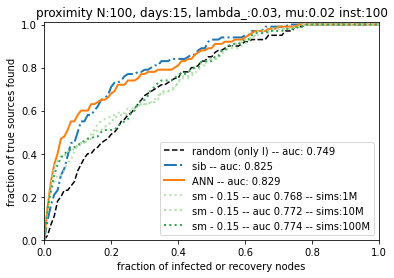

In [23]:
import matplotlib.pyplot as plt
bins=N
plot_patient_zero_roc(plt,
                          pos_sources, 
                          nsims, 
                      args,
                          alpha=14, 
                          bins=bins,
                          range_=(0,1),
                          norm=N,
                          colors=plt.get_cmap("Greens"))
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{100}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)
plt.show()

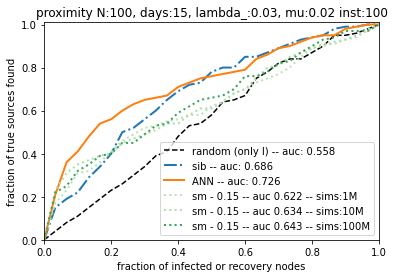

In [24]:
import matplotlib.pyplot as plt
bins=30
plot_patient_zero_roc(plt,
                          pos_sources, 
                          nsims, 
                          args,
                          alpha=14, 
                          bins=bins,
                          range_=(0,1),
                          norm=pos_sources["Is_len"],
                          colors=plt.get_cmap("Greens"))
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{100}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)
plt.show()

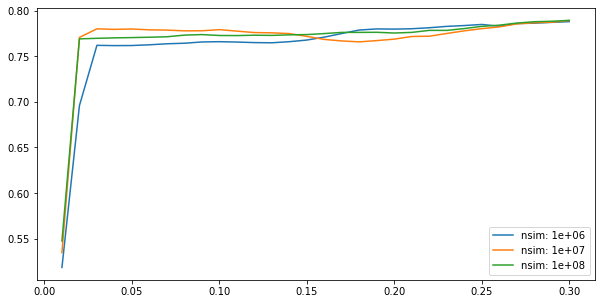

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
norm=N
bins=N
range_=(0,1)
for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(pos_sources["sm"][0][nsim])):
        pos_source_sm=np.array([pos_sources["sm"][ii][nsim][alpha] for ii in range(len(pos_sources["sm"]))])
        s_sm,x = np.histogram(pos_source_sm/norm, bins=bins, range=range_)
        y_sm = np.insert(np.cumsum(s_sm)/len(pos_sources["sm"]),0,0)        
        #print(alpha, np.cumsum(s_sm))
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)

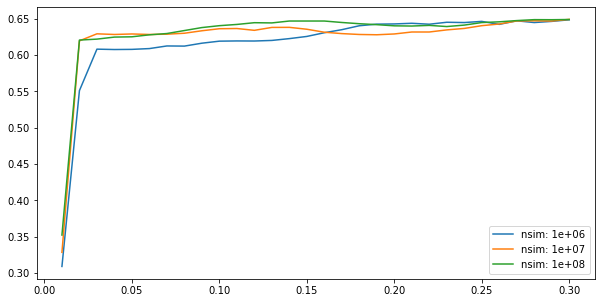

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
norm=pos_sources["Is_len"]
bins=100
range_=(0,1)
for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(pos_sources["sm"][0][nsim])):
        pos_source_sm=np.array([pos_sources["sm"][ii][nsim][alpha] for ii in range(len(pos_sources["sm"]))])
        s_sm,x = np.histogram(pos_source_sm/norm, bins=bins, range=range_)
        y_sm = np.insert(np.cumsum(s_sm)/len(pos_sources["sm"]),0,0)        
        #print(alpha, np.cumsum(s_sm))
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)